In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold, cross_val_score   #to perform kfold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression   # to perform logistic regression
from sklearn.tree import DecisionTreeClassifier    # decision tree
from sklearn.ensemble import RandomForestClassifier  # random forest
from sklearn.neighbors import KNeighborsClassifier   #KNN
from sklearn.preprocessing import StandardScaler   # for z- transform
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing   #label and one-hot encoding
from sklearn.model_selection import train_test_split  # data split
from sklearn.metrics import roc_auc_score    # ROC CURVES
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm    # for losgistic regression result
from sklearn.model_selection import GridSearchCV   # to perform grid search
from sklearn.naive_bayes import GaussianNB    # naive -bayes
from sklearn.ensemble import BaggingClassifier # for bagging
from sklearn.ensemble import ExtraTreesClassifier #extra trees classifier


In [32]:
df=pd.read_csv(r'C:\Users\LENOVO\Desktop\SLC Final\ILPD - ILPD.csv')
df.head()

,Age,Sex,TB,DB,Alkaline phospotase,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [33]:
df.tail()

,Age,Sex,TB,DB,Alkaline phospotase,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.1,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.0,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
581,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2
582,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1


In [34]:
df.shape

(583, 11)

### there are 583 rows and 11 columns

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                    583 non-null int64
Sex                    583 non-null object
TB                     583 non-null float64
DB                     583 non-null float64
Alkaline phospotase    583 non-null int64
Sgpt                   583 non-null int64
Sgot                   583 non-null int64
TP                     583 non-null float64
ALB                    583 non-null float64
A/G Ratio              583 non-null float64
Target                 583 non-null category
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 46.3+ KB


In [87]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
print('Cat_cols :',cat_cols)
print()
num_cols=list(df.select_dtypes(include=['float64','int64']).columns)
print('Num_cols :',num_cols)
print()

Cat_cols : ['Sex']

Num_cols : ['Age', 'TB', 'DB', 'Alkaline phospotase', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']



In [37]:
df.describe()

,Age,TB,DB,Alkaline phospotase,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [38]:
df.max()

Age                      90
Sex                    Male
TB                       75
DB                     19.7
Alkaline phospotase    2110
Sgpt                   2000
Sgot                   4929
TP                      9.6
ALB                     5.5
A/G Ratio               2.8
Target                    2
dtype: object

In [39]:
df.min()

Age                         4
Sex                    Female
TB                        0.4
DB                        0.1
Alkaline phospotase        63
Sgpt                       10
Sgot                       10
TP                        2.7
ALB                       0.9
A/G Ratio                 0.3
Target                      1
dtype: object

In [40]:
df.median()

Age                     45.00
TB                       1.00
DB                       0.30
Alkaline phospotase    208.00
Sgpt                    35.00
Sgot                    42.00
TP                       6.60
ALB                      3.10
A/G Ratio                0.93
Target                   1.00
dtype: float64

In [41]:
df.mean()

Age                     44.746141
TB                       3.298799
DB                       1.486106
Alkaline phospotase    290.576329
Sgpt                    80.713551
Sgot                   109.910806
TP                       6.483190
ALB                      3.141852
A/G Ratio                0.947064
Target                   1.286449
dtype: float64

In [42]:
df.quantile(0.25)

Age                     33.0
TB                       0.8
DB                       0.2
Alkaline phospotase    175.5
Sgpt                    23.0
Sgot                    25.0
TP                       5.8
ALB                      2.6
A/G Ratio                0.7
Target                   1.0
Name: 0.25, dtype: float64

In [43]:
df.quantile(0.75)

Age                     58.0
TB                       2.6
DB                       1.3
Alkaline phospotase    298.0
Sgpt                    60.5
Sgot                    87.0
TP                       7.2
ALB                      3.8
A/G Ratio                1.1
Target                   2.0
Name: 0.75, dtype: float64

In [44]:
cat_cols

['Sex']

In [46]:
for i in cat_cols:
    t = df[i].value_counts().index
    t = t.sort_values()
    for j in t:
        print("percentage of ",j,end = "")
        f = (df[i].value_counts()[j]/303)*100
        print(" in " ,i,end = "")
        print(" column is",f)
    print()

percentage of  Female in  Sex column is 46.864686468646866
percentage of  Male in  Sex column is 145.54455445544554



In [47]:
df['Sex'].value_counts()

Male      441
Female    142
Name: Sex, dtype: int64

In [48]:
df['Target'].value_counts()

1    416
2    167
Name: Target, dtype: int64

## Check for Missing/null values :

In [49]:
df.isnull().sum()

Age                    0
Sex                    0
TB                     0
DB                     0
Alkaline phospotase    0
Sgpt                   0
Sgot                   0
TP                     0
ALB                    0
A/G Ratio              4
Target                 0
dtype: int64

### replacing four null values in A/G Ratio

In [50]:
df['A/G Ratio']=df['A/G Ratio'].fillna(df['A/G Ratio'].mean())

In [51]:
df.isnull().sum()

Age                    0
Sex                    0
TB                     0
DB                     0
Alkaline phospotase    0
Sgpt                   0
Sgot                   0
TP                     0
ALB                    0
A/G Ratio              0
Target                 0
dtype: int64

## Check for outliers:

In [56]:
import matplotlib.pyplot as plt

boxplot for  Age


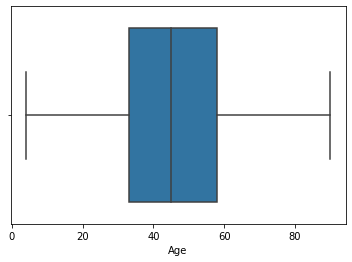

boxplot for  TB


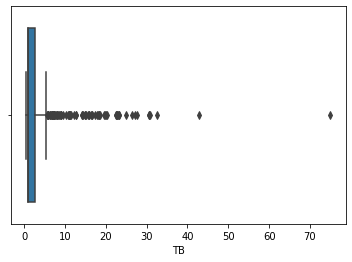

boxplot for  DB


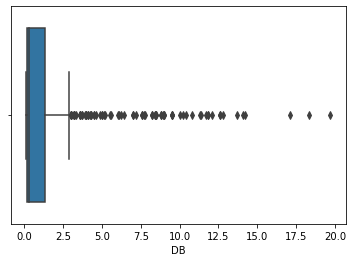

boxplot for  Alkaline phospotase


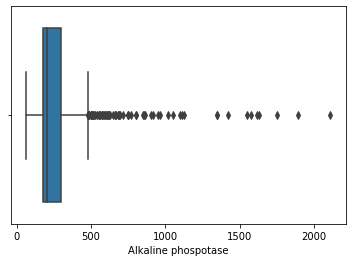

boxplot for  Sgpt


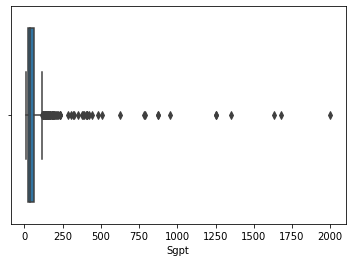

boxplot for  Sgot


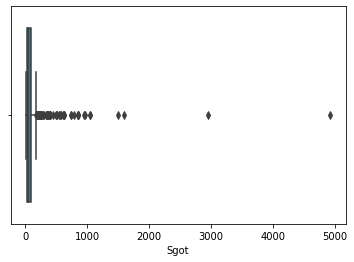

boxplot for  TP


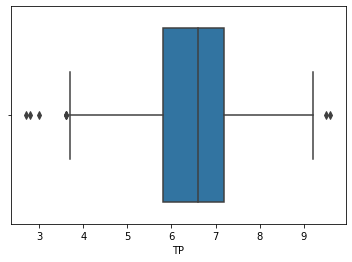

boxplot for  ALB


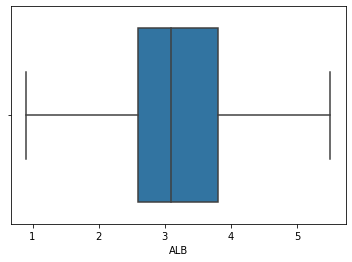

boxplot for  A/G Ratio


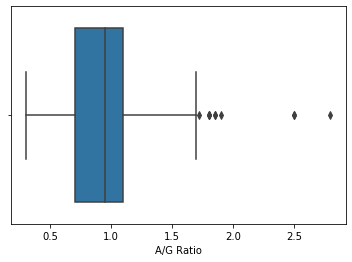

In [59]:
for i in num_cols:
    if i!='Target':
        print("boxplot for ",i)
        sns.boxplot(df[i])
        plt.show()

### there are outliers in all the columns apart from age and albumin.

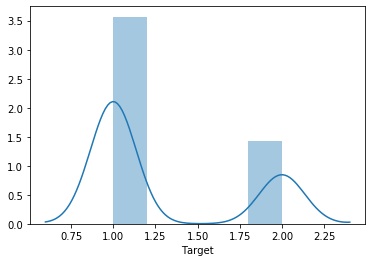

In [60]:
sns.distplot(df['Target'])

### yes the Target is normally distributed..

## Check for Correlation:

In [63]:
c=df.corr()
c

,Age,TB,DB,Alkaline phospotase,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline phospotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
A/G Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Target,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


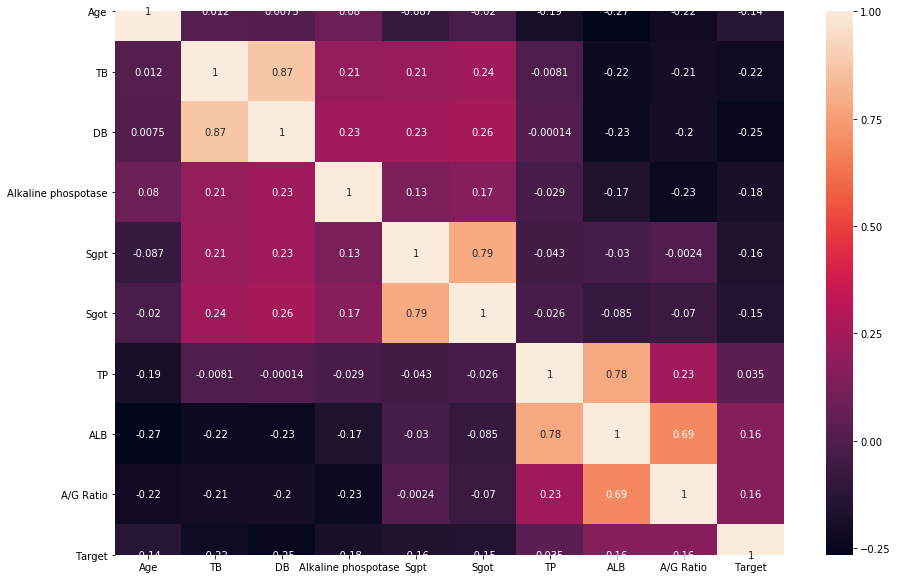

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(c,annot=True)

### from heat map we can find high correlation between sgpt and sgot.
### TP and Albumin are highly correlated.
### albumin and A/G Ratio are highly correlated

## Bivariate Analysis: 

Target    1    2
Sex             
Female   92   50
Male    324  117


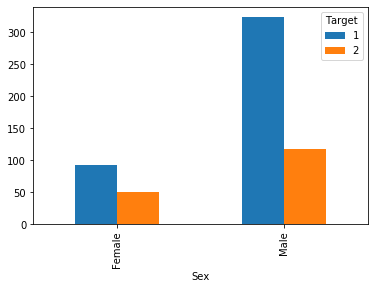

In [68]:
print(pd.crosstab(df['Sex'],df['Target']))
pd.crosstab(df['Sex'],df['Target']).plot.bar()



### we can see males are more subjective to ILPD diseases

In [70]:
num_cols

['Age',
 'TB',
 'DB',
 'Alkaline phospotase',
 'Sgpt',
 'Sgot',
 'TP',
 'ALB',
 'A/G Ratio',
 'Target']

plot between Age and Target


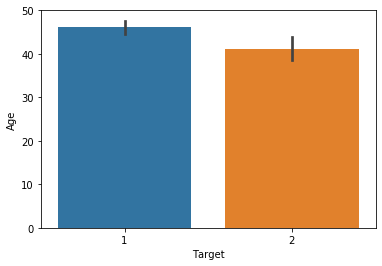


plot between TB and Target


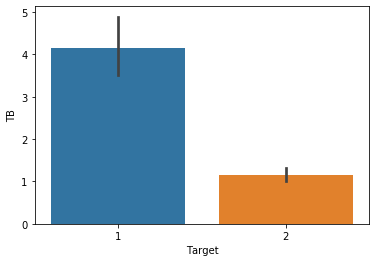


plot between DB and Target


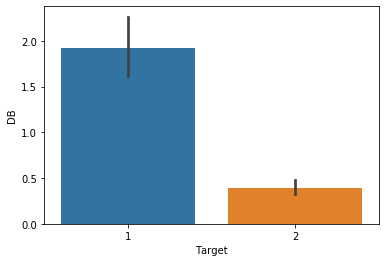


plot between Alkaline phospotase and Target


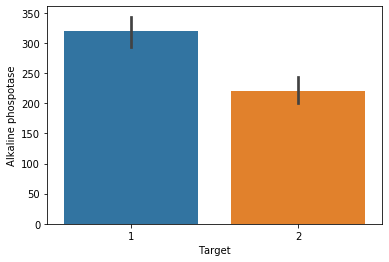


plot between Sgpt and Target


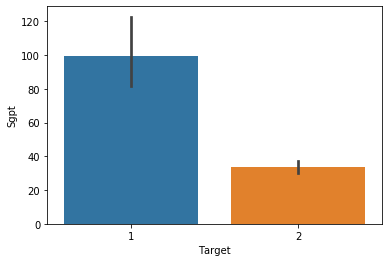


plot between Sgot and Target


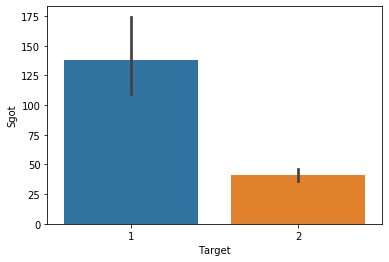


plot between TP and Target


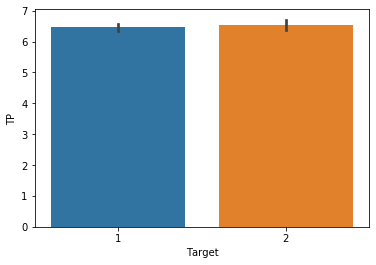


plot between ALB and Target


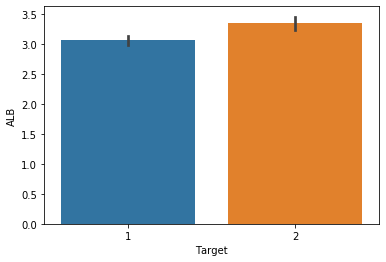


plot between A/G Ratio and Target


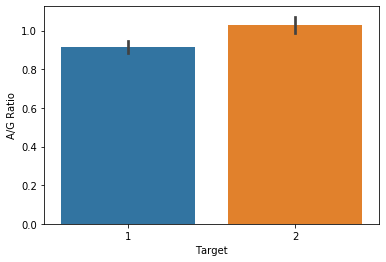


plot between Target and Target


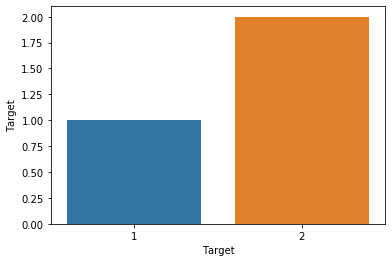

In [71]:
for i in num_cols:
    print("plot between",i,'and Target')
    sns.barplot(df['Target'],df[i])
    plt.show()
    print()

### person belong to age around 45-48 are the most affected.

plot between Age and Sex


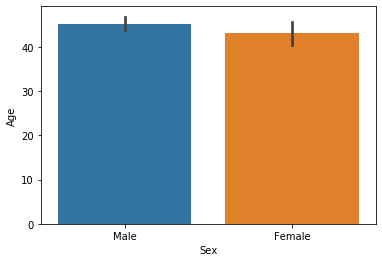


plot between TB and Sex


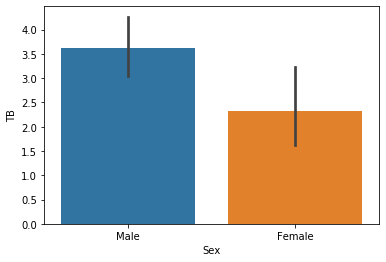


plot between DB and Sex


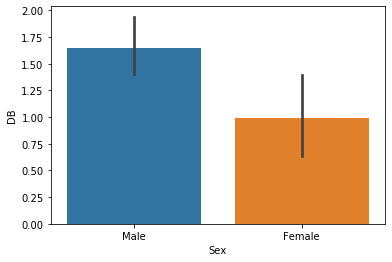


plot between Alkaline phospotase and Sex


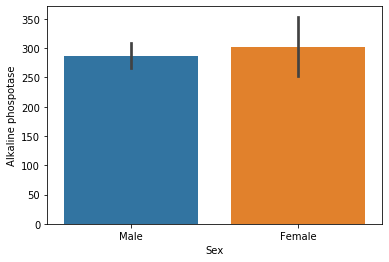


plot between Sgpt and Sex


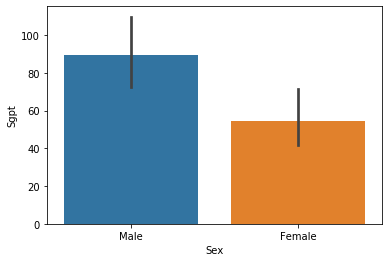


plot between Sgot and Sex


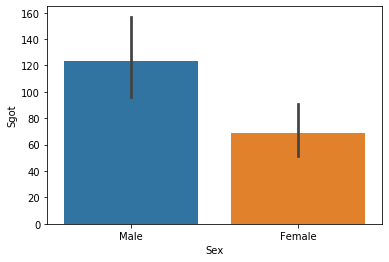


plot between TP and Sex


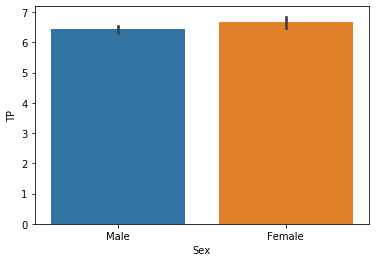


plot between ALB and Sex


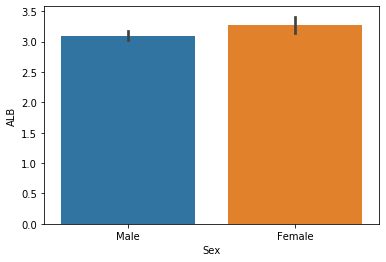


plot between A/G Ratio and Sex


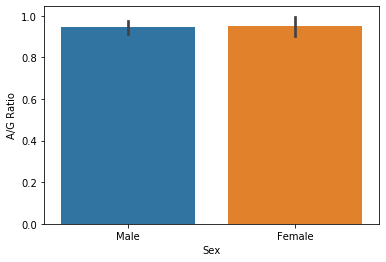

In [74]:
for i in num_cols:
    if i!='Sex' and i!='Target':
        print("plot between",i,'and Sex')
        sns.barplot(df['Sex'],df[i])
        plt.show()
        print()

### Average age of both male and female are almost same.
### Ratio of TB, DB, Sgpt, Sgot content in male is on the higher side compared to female.

In [84]:
df['Target']=df['Target'].astype('category')

In [85]:
df.dtypes

Age                       int64
Sex                      object
TB                      float64
DB                      float64
Alkaline phospotase       int64
Sgpt                      int64
Sgot                      int64
TP                      float64
ALB                     float64
A/G Ratio               float64
Target                 category
dtype: object

In [86]:
num_cols

['Age',
 'TB',
 'DB',
 'Alkaline phospotase',
 'Sgpt',
 'Sgot',
 'TP',
 'ALB',
 'A/G Ratio',
 'Target']

In [90]:
y = df['Target']
x = df.drop('Target',axis = 1)

plot for Age vs  target


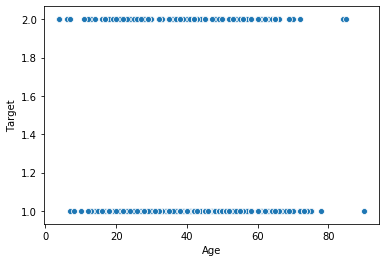

plot for Sex vs  target


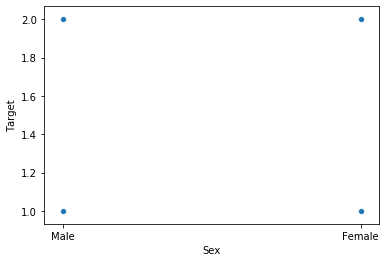

plot for TB vs  target


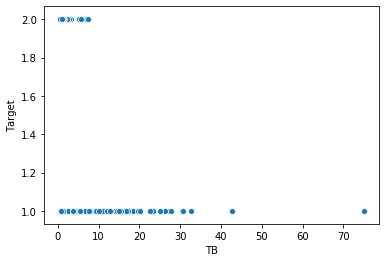

plot for DB vs  target


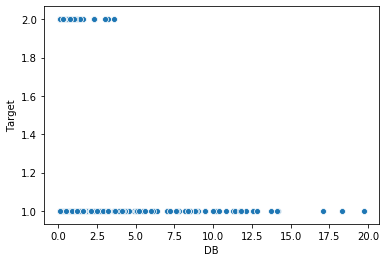

plot for Alkaline phospotase vs  target


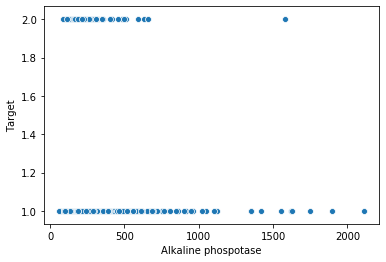

plot for Sgpt vs  target


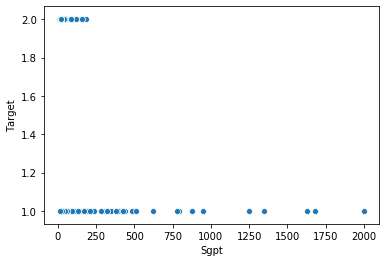

plot for Sgot vs  target


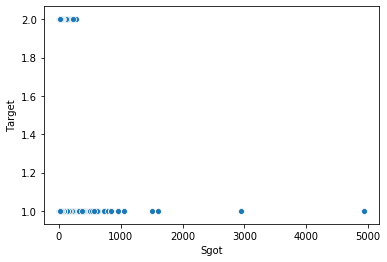

plot for TP vs  target


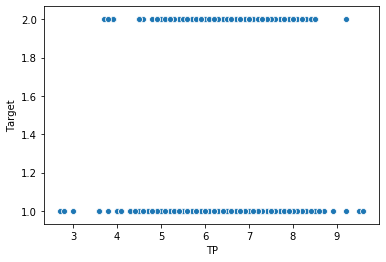

plot for ALB vs  target


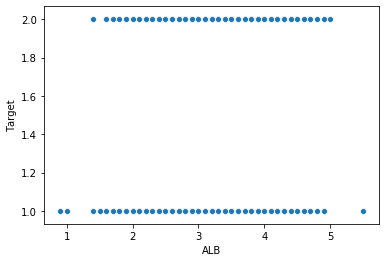

plot for A/G Ratio vs  target


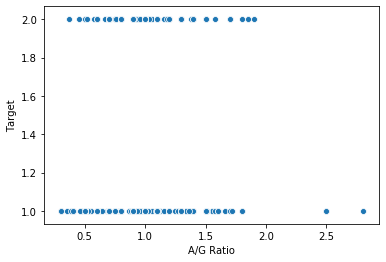

In [91]:
#scatter plot
for i in x.columns:
    print("plot for",i + " vs ","target")
    sns.scatterplot(df[i],df['Target'])
    plt.show()

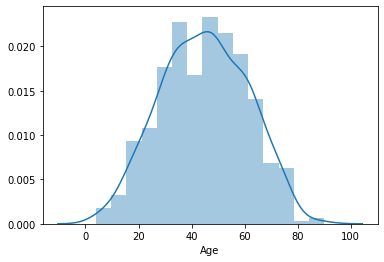

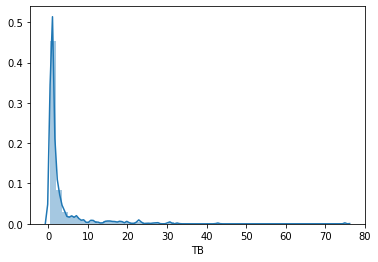

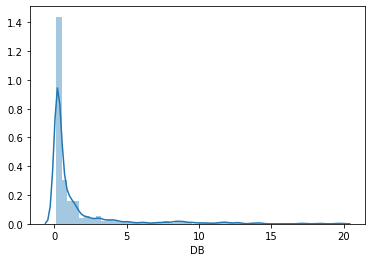

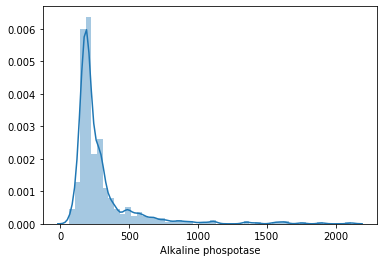

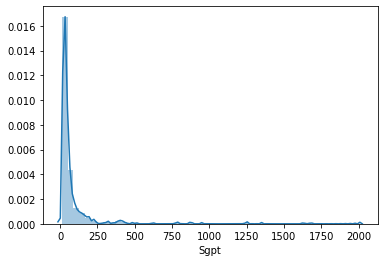

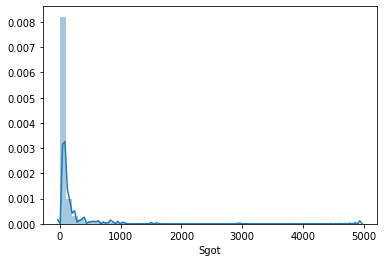

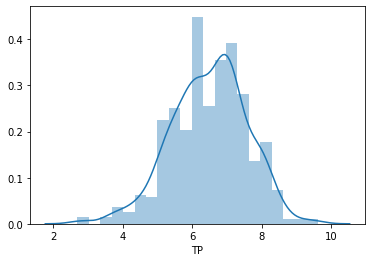

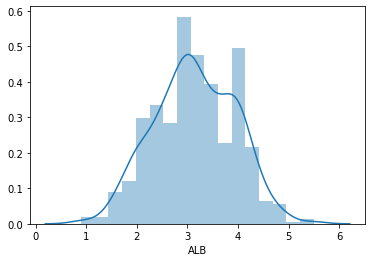

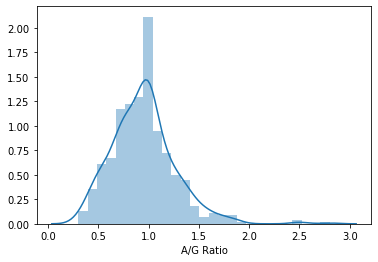

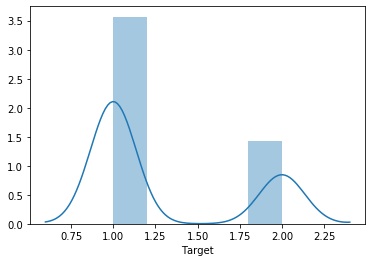

In [77]:
for i in num_cols:
    sns.distplot(df[i])
    plt.show()

In [92]:
df.columns

Index(['Age', 'Sex', 'TB', 'DB', 'Alkaline phospotase', 'Sgpt', 'Sgot', 'TP',
       'ALB', 'A/G Ratio', 'Target'],
      dtype='object')

## Label Encoding:

In [100]:
le = preprocessing.LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])

In [104]:
df.head()

,Age,Sex,TB,DB,Alkaline phospotase,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


## Train and Test Split:

In [107]:
x=df.drop('Target',axis=1)
y=df['Target']

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=20, test_size=0.3)

# ascertain this statistically by checking their shape
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(408, 10)
(175, 10)
(408,)
(175,)


## Base Model Creation: 

In [109]:
#logistic regression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 
# Predict model
y_pred = classifier.predict(xtest) 

# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix : 
 [[108  15]
 [ 41  11]]
Accuracy :  0.68
              precision    recall  f1-score   support

           1       0.72      0.88      0.79       123
           2       0.42      0.21      0.28        52

    accuracy                           0.68       175
   macro avg       0.57      0.54      0.54       175
weighted avg       0.64      0.68      0.64       175



In [110]:
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.68


### base model accuracy is 68% which is need to be improved.

In [111]:
TP=108
FP=15
TN=11
FN=41

In [112]:
p = (TP/(TP + FP))
print("precision is",p)

precision is 0.8780487804878049


In [113]:
r = (TP)/(TP+FN)
print("recall is",r)

recall is 0.7248322147651006


In [114]:
print("F1 Score",(2*p*r)/p+r)

F1 Score 2.1744966442953015


### Recall should be high, as higher the recall-score lower is the FN, which is the most vital in the hospital liver disease prediction. A person with  liver disease should not be classified as not having the liver disease

In [116]:
from sklearn.feature_selection import RFE

In [117]:
#no of features
nof_list=np.arange(1,18)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Optimum number of features: 1
Score with 1 features: 0.737143


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [119]:
cols = list(x.columns)

model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Index(['Age', 'Sex', 'TB', 'DB', 'Alkaline phospotase', 'Sgpt', 'Sgot', 'TP',
       'ALB', 'A/G Ratio'],
      dtype='object')


### important features:
'Age', 'Sex', 'TB', 'DB', 'Alkaline phospotase', 'Sgpt', 'Sgot', 'TP',
       'ALB', 'A/G Ratio'

## Upsampling:

In [128]:
from sklearn.utils import resample

In [125]:
df['Target'].value_counts()

1    416
2    167
Name: Target, dtype: int64

In [142]:
T1 = df[df.Target==1]
T2 = df[df.Target==2]

In [143]:
# upsample minority
# pass the count of minority class and increase it to the same count of minority class
upsampled = resample(T2,
                          replace=True, # sample with replacement
                          n_samples=len(T1), # match number in majority class
                          random_state=0) # reproducible results

In [144]:
upsample=pd.concat([T1,upsampled])

In [146]:
upsample.Target.value_counts()

2    416
1    416
Name: Target, dtype: int64

In [147]:
ytrain = upsample.Target
xtrain = upsample.drop('Target', axis=1)

In [148]:
#logistic regression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 
# Predict model
y_pred = classifier.predict(xtest) 

# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix : 
 [[71 52]
 [13 39]]
Accuracy :  0.6285714285714286
              precision    recall  f1-score   support

           1       0.85      0.58      0.69       123
           2       0.43      0.75      0.55        52

    accuracy                           0.63       175
   macro avg       0.64      0.66      0.62       175
weighted avg       0.72      0.63      0.64       175



### here after upsampling the data accuracy got reduced to 63%.

### applying z-score transformation.

In [149]:
# Z-Transform
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

In [150]:
#logistic regression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 
# Predict model
y_pred = classifier.predict(xtest) 

# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

Confusion Matrix : 
 [[69 54]
 [10 42]]
Accuracy :  0.6342857142857142
              precision    recall  f1-score   support

           1       0.87      0.56      0.68       123
           2       0.44      0.81      0.57        52

    accuracy                           0.63       175
   macro avg       0.66      0.68      0.63       175
weighted avg       0.74      0.63      0.65       175



C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### accuracy on transformed data is 63%

In [151]:
x=df.drop('Target',axis=1)
y=df.Target

In [152]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=20, test_size=0.3)

# ascertain this statistically by checking their shape
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(408, 10)
(175, 10)
(408,)
(175,)


### DESICION TREE MODEL

In [154]:
# DECISION TREE
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(xtrain, ytrain)
# Predicting the Test set results
y_pred = classifier.predict(xtest)


# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

Confusion Matrix : 
 [[92 31]
 [26 26]]
Accuracy :  0.6742857142857143
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       123
           2       0.46      0.50      0.48        52

    accuracy                           0.67       175
   macro avg       0.62      0.62      0.62       175
weighted avg       0.68      0.67      0.68       175



### Desicion tree model gives 67% accuracy.

### RANDOM FOREST MODEL

In [155]:
# Random forest
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain,ytrain)

#predict the model
y_pred=clf.predict(xtest)

# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

Confusion Matrix : 
 [[102  21]
 [ 35  17]]
Accuracy :  0.68
              precision    recall  f1-score   support

           1       0.74      0.83      0.78       123
           2       0.45      0.33      0.38        52

    accuracy                           0.68       175
   macro avg       0.60      0.58      0.58       175
weighted avg       0.66      0.68      0.66       175



### Random forest gives 68% accuracy as base model.

In [157]:
import warnings 
warnings.filterwarnings('ignore')

### GRID search

In [158]:
param_grid = {'max_depth': range(1,20,2),'min_samples_leaf': range(50, 150, 50),
              'min_samples_split': range(50, 150, 50),'criterion': ["entropy", "gini"]}
n_folds = 5
rg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator = rg, param_grid = param_grid,
                          cv = n_folds, verbose = 1)
grid_search.fit(xtrain,ytrain)

model = RandomForestClassifier(max_depth=5,criterion='gini',min_samples_leaf=50,min_samples_split=50,
                               random_state=42)
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(classification_report(ytest, ypred))
print ("Accuracy : ", accuracy_score(ytest, ypred)) 

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           1       0.70      1.00      0.83       123
           2       0.00      0.00      0.00        52

    accuracy                           0.70       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.49      0.70      0.58       175

Accuracy :  0.7028571428571428


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    9.8s finished


### Random Forest Classifier with 5-fold gives 70% accuracy

## KNN

In [159]:
# Z-Transform
sc_x = StandardScaler() 
xtrain_scaled = sc_x.fit_transform(xtrain)  
xtest_scaled = sc_x.transform(xtest)

In [161]:
# KNN 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain_scaled,ytrain)
## predict the model
y_pred = classifier.predict(xtest_scaled)

# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

Confusion Matrix : 
 [[96 27]
 [37 15]]
Accuracy :  0.6342857142857142
              precision    recall  f1-score   support

           1       0.72      0.78      0.75       123
           2       0.36      0.29      0.32        52

    accuracy                           0.63       175
   macro avg       0.54      0.53      0.53       175
weighted avg       0.61      0.63      0.62       175



### KNN model gives around 63% accuracy

### KNN using GRID

In [162]:
# grid search
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x,y)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.7101200686106347
{'n_neighbors': 26, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')


### KNN using Grid gives 71% accuracy

In [165]:
###naive bayes
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
model.fit(x,y)
#Predict Output
y_pred= model.predict(xtest)

# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

Confusion Matrix : 
 [[44 79]
 [ 3 49]]
Accuracy :  0.5314285714285715
              precision    recall  f1-score   support

           1       0.94      0.36      0.52       123
           2       0.38      0.94      0.54        52

    accuracy                           0.53       175
   macro avg       0.66      0.65      0.53       175
weighted avg       0.77      0.53      0.53       175



### naive bayes accuracy is 53% which is really bad.

### Bagging classifier

In [168]:
 # fit a ensemble.BaggingClassifier() model to the data
model = BaggingClassifier()
model.fit(xtrain_scaled, ytrain)
y_pred = model.predict(xtest_scaled)

In [169]:
# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

Confusion Matrix : 
 [[102  21]
 [ 34  18]]
Accuracy :  0.6857142857142857
              precision    recall  f1-score   support

           1       0.75      0.83      0.79       123
           2       0.46      0.35      0.40        52

    accuracy                           0.69       175
   macro avg       0.61      0.59      0.59       175
weighted avg       0.66      0.69      0.67       175



### bagging classifier gives you around 69% accuracy.

### ADA boost Classifier

In [171]:
from sklearn.ensemble import AdaBoostClassifier

In [172]:
classifier=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
classifier.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

In [173]:
# MODEL EVALUATION

cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
print(classification_report(ytest, y_pred) )

Confusion Matrix : 
 [[123   0]
 [ 52   0]]
Accuracy :  0.7028571428571428
              precision    recall  f1-score   support

           1       0.70      1.00      0.83       123
           2       0.00      0.00      0.00        52

    accuracy                           0.70       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.49      0.70      0.58       175



### ADA BOOST is with 70% accuracy.

## 8. Summarization:

The best models are:
    
    base model
    ada boost
    bagging 
    random forest with k-fold

## Business Interpretation:

### Hospital can provide patient-based diet or exercise programs, so that the critical patients can exercise and improve thier health.